In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# **Collecting Data**

In [92]:
from google.colab import drive
drive.mount('/content/drive')
network_data=pd.read_csv('/content/drive/My Drive/ML CSVs/Social_Network_Ads.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
network_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


# **Analyze Data**

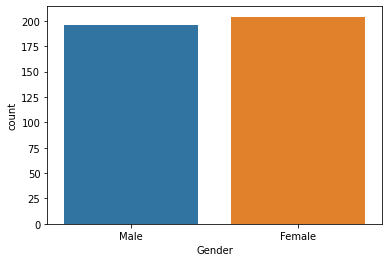

In [94]:
sns.countplot(x='Gender',data=network_data)

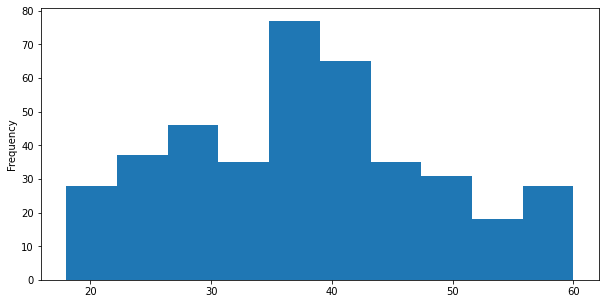

In [95]:
network_data['Age'].plot.hist(bins=10,figsize=(10,5))

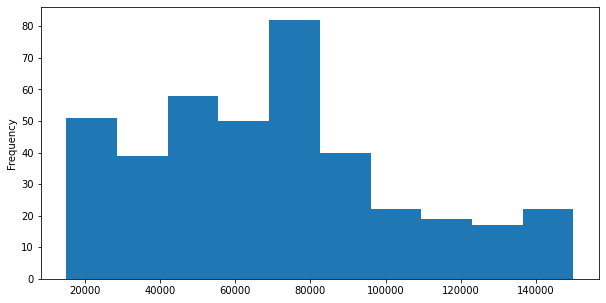

In [96]:
network_data['EstimatedSalary'].plot.hist(bins=10,figsize=(10,5))

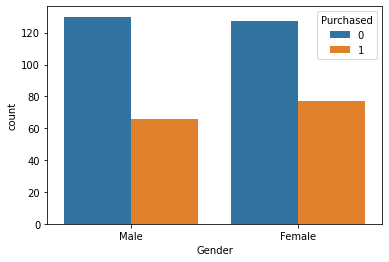

In [97]:
sns.countplot(x='Gender',hue='Purchased',data=network_data)

# **Data Wrangling**

In [98]:
network_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [99]:
network_data.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [100]:
sex=pd.get_dummies(network_data['Gender'],drop_first=True)
sex.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [101]:
network_data=pd.concat([network_data,sex],axis=1)
network_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [0]:
network_data.drop(['User ID','Gender'],axis=1,inplace=True)

In [103]:
network_data.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


# **Test & Train Data**

In [0]:
X=network_data.drop('Purchased',axis=1)
y=network_data['Purchased']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# **1st Process :**

> **By Logistic Regression**



In [106]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions=logmodel.predict(X_test)

# **Accuracy Checking**

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[79,  0],
       [41,  0]])

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.6583333333333333

If we apply Logistic Regression, an accuracy of 65.83% will be achieved

#**2nd Process :**

> **By KNN**



In [110]:
X_train.head()

,Age,EstimatedSalary,Male
92,26,15000,1
223,60,102000,1
234,38,112000,0
232,40,107000,1
377,42,53000,0


In [111]:
y_train.head()

92     0
223    1
234    0
232    1
377    0
Name: Purchased, dtype: int64

In [112]:
X_test.head()

,Age,EstimatedSalary,Male
132,30,87000,1
309,38,50000,0
341,35,75000,1
196,30,79000,0
246,35,50000,0


In [113]:
y_test.head()

132    0
309    0
341    0
196    0
246    0
Name: Purchased, dtype: int64

In [0]:
X_train_list=X_train.to_numpy().tolist()

In [0]:
y_train_list=y_train.tolist()

In [0]:
X_test_list=X_test.to_numpy().tolist()

In [0]:
y_test_list=y_test.tolist()

In [0]:
trainDataSet=[]
for i in range(len(X_train_list)):
    tempList=X_train_list[i]
    tempList.append(y_train_list[i])
    trainDataSet.append(tempList)

testDataSet=[]
for i in range(len(X_test_list)):
    tempList=X_test_list[i]
    tempList.append(y_test_list[i])
    testDataSet.append(tempList)

In [0]:
import math
def euclidianDistance(arr1,arr2,length):
    distance=0
    for i in range(length):
        distance+=pow((arr1[i]-arr2[i]),2)
    return math.sqrt(distance)

In [0]:
def getKNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclidianDistance(testInstance, trainingSet[x], length)
        distances.append((dist,trainingSet[x]))
    finalDistances=sorted(distances)
    final=[]
    for i in range(k):
        final.append(finalDistances[i][1])
    return final

In [0]:
def getVoting(neighbors):
    hash_map={}
    for i in neighbors:
        tempList=hash_map.keys()
        try:
            hash_map[i[3]]+=1
        except:
            hash_map[i[3]]=1

    final_answer=sorted(hash_map.items(), key = lambda kv:(kv[1], kv[0]))
    return final_answer[-1][0]

In [0]:
def getAccuracy(testDataSet, trainDataSet,k):
    predictions=[]
    for i in range(len(testDataSet)):
        fetch_testData=testDataSet[i][:4]
        neighbors=getKNeighbors(trainDataSet,fetch_testData,k)
        result=getVoting(neighbors)
        predictions.append(result)  

    correct = 0
    for x in range(len(testDataSet)):
        if testDataSet[x][-1] is predictions[x]:
            correct += 1
    print( "\nIf The Model Is Been Implimented With KNN, Then It Has An Accuracy of "+str((correct/float(len(testDataSet))) * 100.0)+"%\n")

In [123]:
k=3
getAccuracy(testDataSet,trainDataSet,k)


If The Model Is Been Implimented With KNN, Then It Has An Accuracy of 76.66666666666667%



# **Final Conclusion**

> If we apply Logistic Regression for the above problem, then we can achieve 65.83% of accuracy, whereas if we apply KNN, then we can achieve 76.67% of accuracy.


> So the model should be implimented with KNN supervised algorithm to achieve more accuracy with compare to Logistic Regression.



